# <center>TD4: Régression linéaire </center>

Nous allons développer l'algorithme de la régression linéaire à la main.
Nous allons prendre un cas simple pour commencer où nous avons une seule variable caractéristique nommée *x* et une variable cible nommée *y* .

Le probléme revient donc à trouver les coefficients w0 et w1 de la droite y=w0+W1*x qui approxime au mieux les données.

- développer la classe *RegressionLineaire* ci-dessous qui ne traitera que le cas énoncé plus haut:



In [23]:

import numpy as np
 
#on definit la classe pour 1 variable caractéristique et 1 cible
class RegressionLineaire:
  
    # ici on traite la fonction simple: y=w0*x+w1 (y=valeur prédite et x la variable caractéristique)
    # ici x correspond à une colonne et y aussi

    # constructeur
    # parametres:
    # x: les données relatives à la variable caractéristiques
    # y: les données relatives à la variable cible


    def __init__(self,x , y):
        self.data = x
        self.target = y
        self.w1 = 0
        self.w0 = 0
        self.cost=[]
    
    # méthodes qui réalise la descente du gradient et calcule les valeurs de w0 et w1 
    # paramètres:
    # nb_iteration: le nombre d'itération pour la descente du gradient
    # learning_rate: le taux d'apprentissage  
    
    def fit(self , nb_iteration , learning_rate):
         
        #la descente du gradient
        m=len(self.data)
        for i in range(nb_iteration):
            y_pred = self.predict(self.data)
             #on calcule les dérivées partielles du coût par rapport à wo et w1
             #u**2 prime = 2u uprime
            D_w1 = (-2/m)*sum(self.data * (self.target - y_pred))
           
            D_w0 = (-2/m)*sum(self.target-y_pred)

            #mise à jour des paramètres, il y a deux paramètres
            self.w1 = self.w1 - learning_rate * D_w1
            self.w0 = self.w0 - learning_rate * D_w0
            # calcul du coût
            y_pred = self.predict(self.data)
            cost = np.sum(((y_pred-self.target) ** 2)/ m )
            # on ajoute le nouveau coût au vecteur de coût
            self.cost.append(cost)


    # méthode qui calcule les valeurs prédites pour chaque valeur de la variable caractéristique
    # retour: 
    # un tableau contenant les valeurs prédites       
    def predict(self , data):
        y_pred = self.w1 * data + self.w0
        return y_pred

Vous allez maintenant représenter graphiquement, les données de départ et la droite de régression déterminée par le traitement précédent. Nous utiliserons les données définies dans la cellule ci-dessous. Réaliser l'apprentissage avec 1000 itérations et un learning rate de 0.01. 

[10.54667868]
/n
[4.95904895]


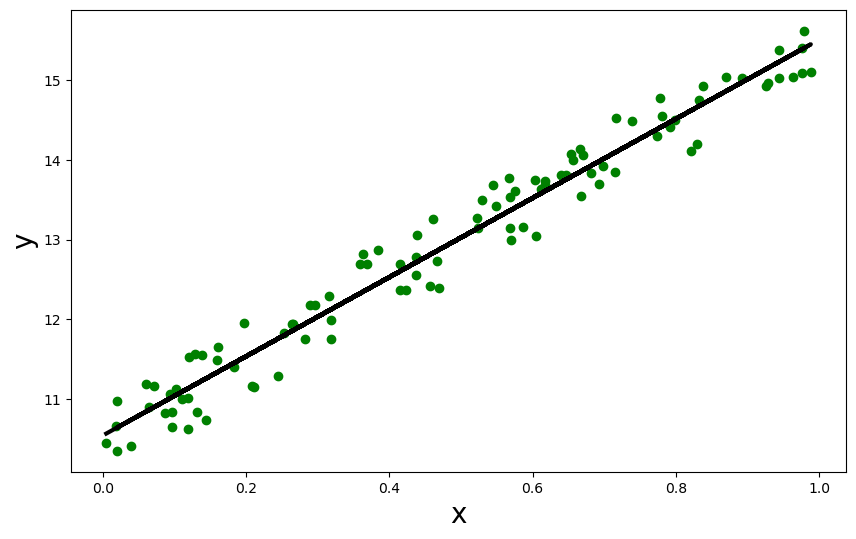

In [24]:

import matplotlib.pyplot as plt
import pandas as pd

 

# générer un dataset aléatoire
np.random.seed(0)
x = np.random.rand(100, 1)
y = 10 + 5 * x + np.random.rand(100, 1)
 
regressor = RegressionLineaire(x,y)
 
#entrainement
regressor.fit(2000 , 0.01) 
 
#valeurs prédites
y_pred = regressor.predict(x)
print(regressor.w0)
print("/n")
print(regressor.w1)
 
#affichage des résultats
plt.figure(figsize = (10,6))
plt.scatter(x,y , color = 'green')
plt.plot(x , y_pred , color = 'k' , lw = 3)
plt.xlabel('x' , size = 20)
plt.ylabel('y', size = 20)
plt.show()

Représenter l'évolution du coût pendant l'entraînement (en fonction des valeurs des itérations) pour un *learning rate* défini (ici 0.01).   
Que constatez vous ?  
Tester d'autres valeurs pour le nombre d'itérations.

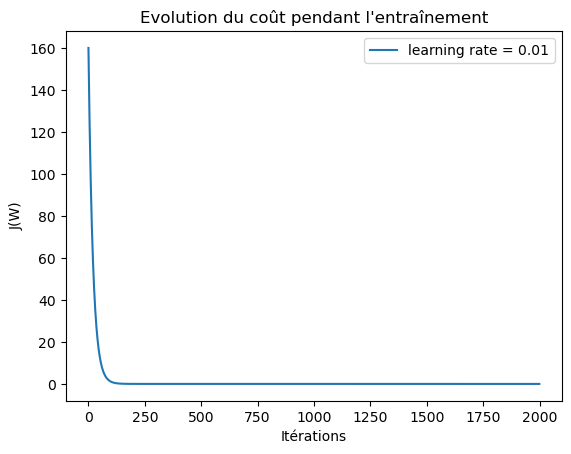

In [25]:
plt.plot(regressor.cost, label="learning rate = 0.01")
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.title("Evolution du coût pendant l\'entraînement")
plt.legend()
plt.show()

Nous allons maintenant étudier la valeur du *learning rate* en fonction du coût.
Calculer les coûts obtenus pour 2000 itérations pour les valeurs du learning rate de 0.1, 0.01 et 0.001. Réaliser une représentation graphique (en ordonnée le coût et en abscisse le nombre d'itérations)  
- que constatez vous ?
- tester les 3 valeurs des *learning rate* avec les résultats obtenus

In [18]:
iterations=2000
learning_rate = [0.1, 0.01, 0.001]
J_history = np.zeros((iterations, len(learning_rate)))

for i in range(0, len(learning_rate)) :
  regressor = RegressionLineaire(x,y)
  regressor.fit(iterations,learning_rate[i])
  J_history[:, i] = regressor.cost

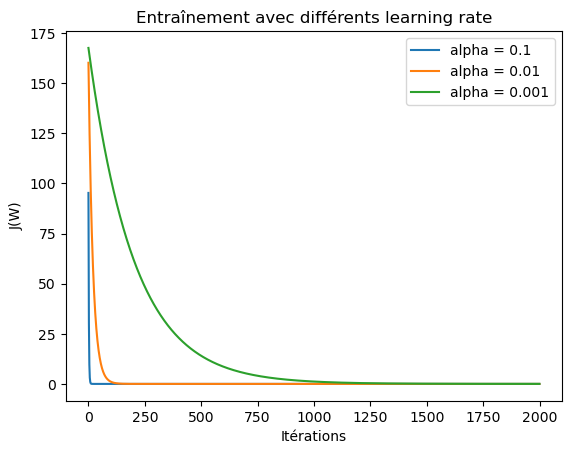

In [19]:
plt.plot(J_history[:, 0], label="alpha = 0.1")
plt.plot(J_history[:, 1], label="alpha = 0.01")
plt.plot(J_history[:, 2], label="alpha = 0.001")

plt.title('Entraînement avec différents learning rate')
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.legend()
plt.show()